# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Dataset and Creating Train/Test Split

In [2]:
from utils import train_transforms,test_transforms
train_data = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [3]:
SEED = 2

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data,**args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
# Shape of the train data
print (train_data.data.shape)
# Shape of the test data
print (test_data.data.shape)

# Number of categories in the data
print (len(train_data.classes))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
10


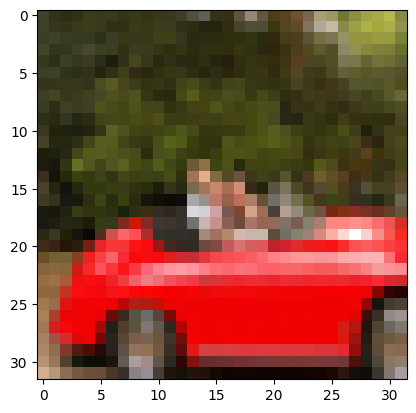

automobile


In [5]:
# Visualizing an image from train data
import matplotlib.pyplot as plt
img = train_data.data[99]
label = train_data.targets[99]

plt.imshow(img)
plt.show()

for key, value in enumerate(train_data.class_to_idx):
  if key == label:
      print (value)

In [6]:
# Model Summary
from model import Model_Norm
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_Norm(norm_type='gn').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
         GroupNorm-2           [-1, 16, 32, 32]              32
           Dropout-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
         GroupNorm-5           [-1, 16, 32, 32]              32
           Dropout-6           [-1, 16, 32, 32]               0
            Conv2d-7            [-1, 8, 32, 32]             128
         MaxPool2d-8            [-1, 8, 16, 16]               0
            Conv2d-9           [-1, 24, 16, 16]           1,728
        GroupNorm-10           [-1, 24, 16, 16]              48
          Dropout-11           [-1, 24, 16, 16]               0
           Conv2d-12           [-1, 24, 16, 16]           5,184
        GroupNorm-13           [-1, 24, 16, 16]              48
          Dropout-14           [-1

In [7]:
# Training And Testing

In [8]:
from torch.optim.lr_scheduler import StepLR
from model import train,test
model =  Model_Norm(norm_type='gn').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


Loss=1.5893195867538452 Batch_id=390 Accuracy=36.54: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]



Test set: Average loss: 1.5382, Accuracy: 4448/10000 (44.48%)

EPOCH: 1


Loss=1.2479809522628784 Batch_id=390 Accuracy=48.37: 100%|██████████| 391/391 [00:48<00:00,  8.12it/s]



Test set: Average loss: 1.2569, Accuracy: 5369/10000 (53.69%)

EPOCH: 2


Loss=1.1360158920288086 Batch_id=390 Accuracy=54.19: 100%|██████████| 391/391 [00:49<00:00,  7.85it/s]



Test set: Average loss: 1.1916, Accuracy: 5787/10000 (57.87%)

EPOCH: 3


Loss=1.225823998451233 Batch_id=390 Accuracy=57.40: 100%|██████████| 391/391 [00:48<00:00,  8.01it/s]



Test set: Average loss: 1.0618, Accuracy: 6246/10000 (62.46%)

EPOCH: 4


Loss=1.0641520023345947 Batch_id=390 Accuracy=60.01: 100%|██████████| 391/391 [00:49<00:00,  7.98it/s]



Test set: Average loss: 1.0420, Accuracy: 6369/10000 (63.69%)

EPOCH: 5


Loss=0.8589842915534973 Batch_id=390 Accuracy=61.90: 100%|██████████| 391/391 [00:49<00:00,  7.88it/s]



Test set: Average loss: 0.9986, Accuracy: 6427/10000 (64.27%)

EPOCH: 6


Loss=1.0330588817596436 Batch_id=390 Accuracy=65.60: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]



Test set: Average loss: 0.9406, Accuracy: 6677/10000 (66.77%)

EPOCH: 7


Loss=0.9482709169387817 Batch_id=390 Accuracy=65.72: 100%|██████████| 391/391 [00:49<00:00,  7.97it/s]



Test set: Average loss: 0.9169, Accuracy: 6744/10000 (67.44%)

EPOCH: 8


Loss=1.0225317478179932 Batch_id=390 Accuracy=66.32: 100%|██████████| 391/391 [00:48<00:00,  7.98it/s]



Test set: Average loss: 0.9258, Accuracy: 6697/10000 (66.97%)

EPOCH: 9


Loss=0.9989593625068665 Batch_id=390 Accuracy=66.52: 100%|██████████| 391/391 [00:49<00:00,  7.85it/s]



Test set: Average loss: 0.9142, Accuracy: 6766/10000 (67.66%)

EPOCH: 10


Loss=0.9339269399642944 Batch_id=390 Accuracy=66.67: 100%|██████████| 391/391 [00:50<00:00,  7.82it/s]



Test set: Average loss: 0.9139, Accuracy: 6778/10000 (67.78%)

EPOCH: 11


Loss=1.0744869709014893 Batch_id=390 Accuracy=66.82: 100%|██████████| 391/391 [00:50<00:00,  7.69it/s]



Test set: Average loss: 0.9040, Accuracy: 6787/10000 (67.87%)

EPOCH: 12


Loss=0.8159489631652832 Batch_id=390 Accuracy=67.22: 100%|██████████| 391/391 [00:50<00:00,  7.67it/s]



Test set: Average loss: 0.9005, Accuracy: 6811/10000 (68.11%)

EPOCH: 13


Loss=0.8793666958808899 Batch_id=390 Accuracy=67.30: 100%|██████████| 391/391 [00:50<00:00,  7.68it/s]



Test set: Average loss: 0.9033, Accuracy: 6797/10000 (67.97%)

EPOCH: 14


Loss=1.0208778381347656 Batch_id=390 Accuracy=67.39: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]



Test set: Average loss: 0.8979, Accuracy: 6811/10000 (68.11%)

EPOCH: 15


Loss=0.8684247732162476 Batch_id=390 Accuracy=67.23: 100%|██████████| 391/391 [00:51<00:00,  7.65it/s]



Test set: Average loss: 0.9005, Accuracy: 6812/10000 (68.12%)

EPOCH: 16


Loss=0.8890899419784546 Batch_id=390 Accuracy=67.45: 100%|██████████| 391/391 [00:50<00:00,  7.78it/s]



Test set: Average loss: 0.8967, Accuracy: 6820/10000 (68.20%)

EPOCH: 17


Loss=0.8921225666999817 Batch_id=390 Accuracy=67.37: 100%|██████████| 391/391 [00:50<00:00,  7.82it/s]



Test set: Average loss: 0.8940, Accuracy: 6821/10000 (68.21%)

EPOCH: 18


Loss=0.6945034265518188 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [00:50<00:00,  7.75it/s]



Test set: Average loss: 0.8968, Accuracy: 6813/10000 (68.13%)

EPOCH: 19


Loss=1.1051573753356934 Batch_id=390 Accuracy=67.49: 100%|██████████| 391/391 [01:00<00:00,  6.42it/s]



Test set: Average loss: 0.8975, Accuracy: 6812/10000 (68.12%)



In [11]:

# Wrong predictions
cnt=0
import random
data, target = next(iter(test_loader))
data, target = data.to(device), target.to(device)
output = model(data)
pred = output.argmax(dim=1, keepdim=True)
img_lst=[]
cat_lst=[]
x_lst=[]
for i in range(0,127):
  x = random.randint(0,127)

  if pred[x].item()!=target[x].item():
    img=data[x].cpu().numpy().T
    img_lst.append(img)
    cat=[value for key,value in enumerate(train_data.class_to_idx) if key==target[x].item()][0]
    cat_lst.append(cat)
    x_lst.append(x)
    cnt+=1
  if cnt>9:
    break

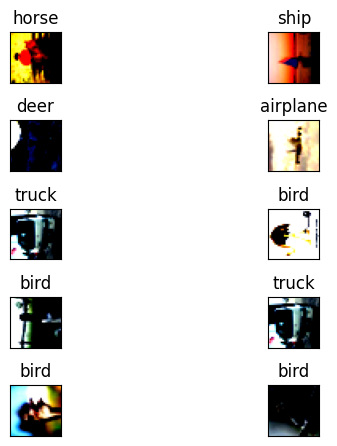

In [12]:
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.tight_layout()
  plt.imshow(img_lst[i])
  plt.title(cat_lst[i])
  plt.xticks([])
  plt.yticks([])